In [1]:
#Import libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy.stats
import yellowbrick

sns.set(font = 'Serif', style = 'white', rc = {'axes.facecolor':'#f1f1f1', 'figure.facecolor':'#f1f1f1'})

In [2]:
df = pd.read_csv(r'E:\Downloads\CSVFile\BRCA.csv')
df.head(10)

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36,FEMALE,0.080353,0.42638,0.547150,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43,FEMALE,-0.420320,0.57807,0.614470,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,9-Nov-18,Dead
2,TCGA-A8-A079,69,FEMALE,0.213980,1.31140,-0.327470,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,8-Sep-17,9-Jun-18,Alive
3,TCGA-D8-A1XR,56,FEMALE,0.345090,-0.21147,-0.193040,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56,FEMALE,0.221550,1.90680,0.520450,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,6-May-17,27-Jun-19,Dead
5,TCGA-AO-A1KQ,84,MALE,-0.081872,1.72410,-0.057335,0.043025,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,18-Sep-17,15-Nov-21,Alive
6,TCGA-D8-A73X,53,FEMALE,-0.069535,1.41830,-0.361050,0.391580,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Simple Mastectomy,4-Feb-17,7-Feb-18,Alive
7,TCGA-A7-A426,50,FEMALE,0.672490,1.27900,-0.321070,-0.112390,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Simple Mastectomy,16-May-17,NaN,NaN
8,TCGA-EW-A1P5,77,FEMALE,-0.151750,-0.66332,1.189400,0.217180,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,28-Sep-17,28-Sep-18,Alive
9,TCGA-A8-A09A,40,FEMALE,-0.565700,1.26680,-0.293460,0.193950,II,Infiltrating Lobular Carcinoma,Positive,Positive,Positive,Other,14-Feb-17,15-Dec-17,Alive


In [3]:
pd.crosstab(df['Gender'],df['Tumour_Stage'],margins=True)

Tumour_Stage,I,II,III,All
Gender,,,,
FEMALE,64,186,80,330
MALE,0,3,1,4
All,64,189,81,334


In [4]:
df.dropna(inplace=True)
df.describe()

,Age,Protein1,Protein2,Protein3,Protein4
count,317.000000,317.000000,317.000000,317.000000,317.000000
mean,58.725552,-0.027232,0.949557,-0.095104,0.006713
std,12.827374,0.543858,0.906153,0.589027,0.625965
min,29.000000,-2.144600,-0.978730,-1.627400,-2.025500
25%,49.000000,-0.350600,0.368840,-0.531360,-0.382240
50%,58.000000,0.005649,0.997130,-0.193040,0.038522
75%,67.000000,0.336260,1.612000,0.251210,0.436250
max,90.000000,1.593600,3.402200,2.193400,1.629900


In [5]:
num_cols = df.describe().columns.values
cols = df.columns.values
cat_cols = np.array(['Tumour_Stage','Histology','ER status','PR status','HER2 status','Surgery_type'])
cat_cols

array(['Tumour_Stage', 'Histology', 'ER status', 'PR status',
       'HER2 status', 'Surgery_type'], dtype='<U12')

In [6]:
df.Gender.value_counts()
df = df[df.Gender=='FEMALE']

In [7]:
date_cols = ['Date_of_Surgery','Date_of_Last_Visit']
for dc in date_cols:
    df[dc] = pd.to_datetime(df[dc])
df['Day_delta'] = df['Date_of_Surgery'] - df['Date_of_Last_Visit']
df.shape

(313, 17)

Alive    252
Dead      61
Name: Patient_Status, dtype: int64


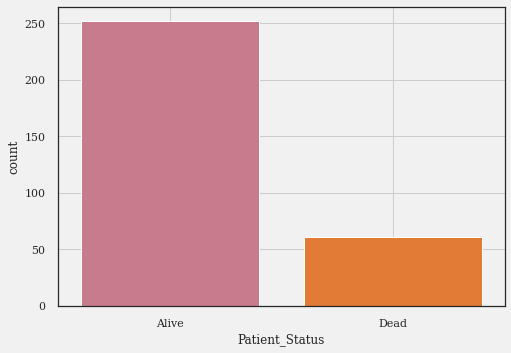

In [8]:
# basic stats
target = 'Patient_Status'
print(df[target].value_counts())
background_color ='#fafafa'
color_palette = ['#d46e87','#FF7518']
sns.countplot(data = df, x='Patient_Status',palette = color_palette)
plt.grid()
plt.show()

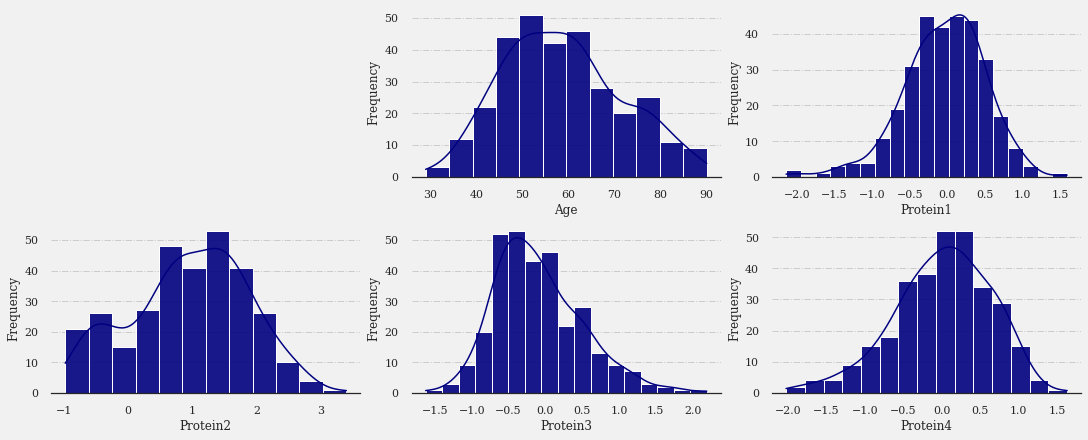

In [9]:
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (15, 6), constrained_layout = True) # axis.patches can't be used
gs = fig.add_gridspec(3,3)
gs.update(wspace=0.5, hspace=0.25)
background_color ='#fafafa'

ax0 = ax[0,0]
ax0.set_axis_off()
ax = np.delete(ax.ravel(),0)

for axes,num in zip(ax.ravel(),num_cols):
    sns.histplot(x = num, data = df, ax = axes, kde = True, alpha =0.9, color = 'navy')
    axes.set_ylabel('Frequency')
    axes.grid(which='major',ls='-.',axis='y')
    
for axes in ax.ravel():
    for i in ['top','left','right']:
        axes.spines[i].set_visible(False)
    

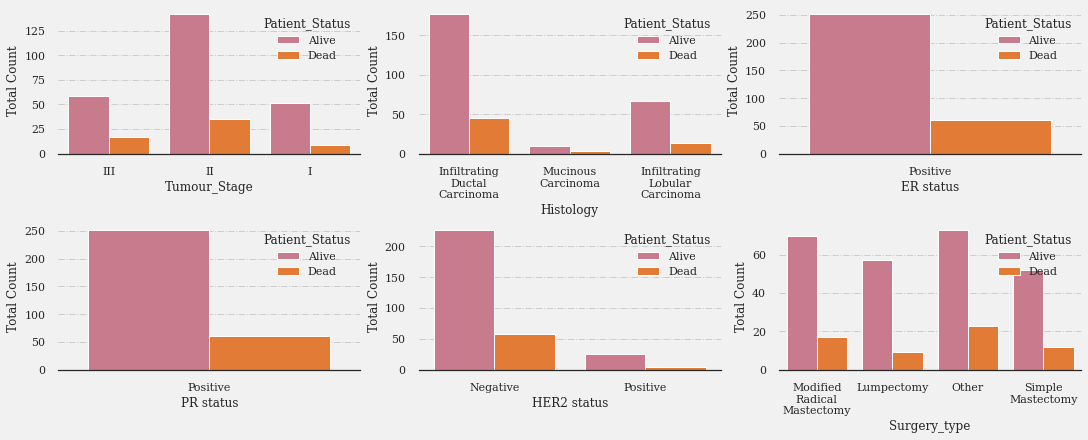

In [10]:
import textwrap

fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (15, 6), constrained_layout = True) # axis.patches can't be used
gs = fig.add_gridspec(3,3)
gs.update(wspace=0.5, hspace=0.25)
background_color ='#fafafa'
color_palette = ['#d46e87','#FF7518']

for axes,cat in zip(ax.ravel(),cat_cols):
    sns.countplot(x = cat, data = df, ax = axes, hue='Patient_Status', palette = color_palette)
    axes.set_ylabel('Total Count')
    axes.grid(which='major',ls='-.',axis='y')
    
for axes in ax.ravel():
    for i in ['top','left','right']:
        axes.spines[i].set_visible(False)
    # Wrap xticklabels :
    labels = [textwrap.fill(label.get_text(), 15) for label in axes.get_xticklabels()]
    axes.set_xticklabels(labels)


In [11]:
df_corr = df[num_cols].corr().transpose()
df_corr

,Age,Protein1,Protein2,Protein3,Protein4
Age,1.000000,-0.043418,-0.015972,-0.051752,0.096034
Protein1,-0.043418,1.000000,0.234690,-0.103394,0.268993
Protein2,-0.015972,0.234690,1.000000,-0.409570,0.085358
Protein3,-0.051752,-0.103394,-0.409570,1.000000,0.078182
Protein4,0.096034,0.268993,0.085358,0.078182,1.000000


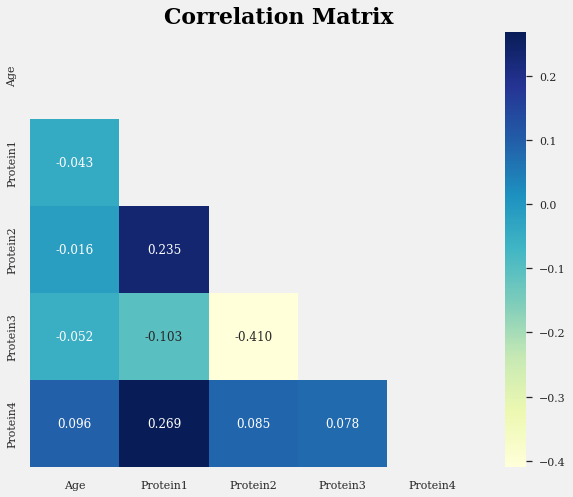

In [12]:
fig = plt.figure(figsize=(10,8))
gs = fig.add_gridspec(1,1)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])

color_palette = ["#5833ff","#da8829"]
mask = np.triu(np.ones_like(df_corr))
ax0.text(1.5,-0.1,"Correlation Matrix",fontsize=22, fontweight='bold', fontfamily='serif', color="#000000")
sns.heatmap(df_corr,mask=mask,fmt=".3f",annot=True,cmap='YlGnBu')
plt.show()

In [13]:
df['Histology'].unique()
df1 = df
df1 = pd.get_dummies(df1, columns = cat_cols, drop_first = True)
df1

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Date_of_Surgery,Date_of_Last_Visit,Patient_Status,Day_delta,Tumour_Stage_II,Tumour_Stage_III,Histology_Infiltrating Lobular Carcinoma,Histology_Mucinous Carcinoma,HER2 status_Positive,Surgery_type_Modified Radical Mastectomy,Surgery_type_Other,Surgery_type_Simple Mastectomy
0,TCGA-D8-A1XD,36,FEMALE,0.080353,0.42638,0.54715,0.273680,2017-01-15,2017-06-19,Alive,-155 days,0,1,0,0,0,1,0,0
1,TCGA-EW-A1OX,43,FEMALE,-0.420320,0.57807,0.61447,-0.031505,2017-04-26,2018-11-09,Dead,-562 days,1,0,0,1,0,0,0,0
2,TCGA-A8-A079,69,FEMALE,0.213980,1.31140,-0.32747,-0.234260,2017-09-08,2018-06-09,Alive,-274 days,0,1,0,0,0,0,1,0
3,TCGA-D8-A1XR,56,FEMALE,0.345090,-0.21147,-0.19304,0.124270,2017-01-25,2017-07-12,Alive,-168 days,1,0,0,0,0,1,0,0
4,TCGA-BH-A0BF,56,FEMALE,0.221550,1.90680,0.52045,-0.311990,2017-05-06,2019-06-27,Dead,-782 days,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,TCGA-AR-A1AL,60,FEMALE,0.094585,1.00030,-0.22575,0.048602,2019-11-01,2021-02-28,Dead,-485 days,0,1,0,0,0,0,0,1
329,TCGA-AN-A04A,36,FEMALE,0.231800,0.61804,-0.55779,-0.517350,2019-11-11,2020-02-09,Dead,-90 days,0,1,0,0,1,0,0,1
331,TCGA-A1-A0SG,61,FEMALE,-0.719470,2.54850,-0.15024,0.339680,2019-11-11,2021-01-18,Dead,-434 days,1,0,0,0,0,0,0,0
332,TCGA-A2-A0EU,79,FEMALE,0.479400,2.05590,-0.53136,-0.188480,2019-11-21,2021-02-19,Dead,-456 days,0,0,0,0,1,0,0,0


In [14]:
X = df1.drop(['Patient_ID','Age','Gender','Date_of_Surgery','Date_of_Last_Visit','Patient_Status','Day_delta'],axis=1)
y = df1['Patient_Status']

In [18]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, classification_report, roc_curve
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.15, random_state = 42)
print("The shape of X_train is      ", X_train.shape)
print("The shape of X_test is       ",X_test.shape)
print("The shape of y_train is      ",y_train.shape)
print("The shape of y_test is       ",y_test.shape)

The shape of X_train is       (266, 12)
The shape of X_test is        (47, 12)
The shape of y_train is       (266,)
The shape of y_test is        (47,)


In [19]:
clf = SVC(kernel='linear', C=1, gamma='auto', random_state=42).fit(X_train,y_train)
y_pred = clf.predict(X_test)
y_pred
print("The test accuracy score of SVM is ", accuracy_score(y_test, y_pred))

The test accuracy score of SVM is  0.8085106382978723


In [20]:
from sklearn.model_selection import GridSearchCV

svm = SVC()
# setting a grid - not so extensive
param_grid = [{'kernel': ['rbf'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                     'C': [0.001, 0.01, 0.1, 10, 25, 50, 100, 1000]},
              {'kernel': ['sigmoid'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                     'C': [0.001, 0.01, 0.1, 10, 25, 50, 100, 1000]},
              {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 10, 25, 50, 100, 1000]}
                   ]

# instantiating the GridSearchCV object
searcher = GridSearchCV(svm, param_grid, cv=5, verbose=True, n_jobs=-1, scoring='accuracy')

# fitting the object
searcher.fit(X_train, y_train.values.ravel())

# the scores
print("The best params are :", searcher.best_params_)
print("The best score is   :", searcher.best_score_)

# predicting the values
y_pred = searcher.predict(X_test)

# printing the test accuracy
print("The test accuracy score of SVM after hyper-parameter tuning is ", accuracy_score(y_test, y_pred))

Fitting 5 folds for each of 72 candidates, totalling 360 fits
The best params are : {'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}
The best score is   : 0.8045422781271838
The test accuracy score of SVM after hyper-parameter tuning is  0.8085106382978723


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
scl = {}

for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors = i)
    scores = cross_val_score(knn, X_train, y_train, 
                         cv=10,
                         scoring='accuracy')
    scl[i] = round(np.mean(scores),3)
print(scl[max(scl,key = scl.get)])

In [ ]:
gnb_clf = GaussianNB()
parameters = {'var_smoothing': np.logspace(0,-9,num=10)}
clf = GridSearchCV( estimator = gnb_clf, 
                    param_grid = parameters, 
                    cv=10,
                    scoring = 'accuracy',
                    verbose = 0)
clf.fit(X_train, y_train)
clf.best_estimator_

In [ ]:
from yellowbrick.model_selection import RFECV
from sklearn.ensemble import RandomForestClassifier

visualizer = RFECV(RandomForestClassifier(), cv=5, scoring='f1_weighted')

visualizer.fit(X_train, y_train)        # Fit the data to the visualizer
visualizer.show()  

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE
from sklearn.model_selection import StratifiedKFold


model1 = SVC(C=0.0001,kernel='rbf')

rfecv = RFECV(
    estimator=model1,
    step=1,
    cv=StratifiedKFold(5),
    scoring="accuracy",
    min_features_to_select=9
)

rfecv.fit(X_train, y_train.values.ravel())

In [ ]:
X_train1 = fit.transform(X_train)

In [ ]:
model1.fit(X_train1, y_train.values.ravel())
y_pred = model1.predict(X_test[features].values)
print(accuracy_score(y_test, y_pred))